In [1]:
from fastai2.vision.all import *

In [2]:
path = untar_data(URLs.PETS)

In [3]:
path.ls()

(#3) [Path('/home/jupyter/.fastai/data/oxford-iiit-pet/models'),Path('/home/jupyter/.fastai/data/oxford-iiit-pet/annotations'),Path('/home/jupyter/.fastai/data/oxford-iiit-pet/images')]

In [4]:
files = get_image_files(path/"images")

In [5]:
len(files)

7390

In [6]:
def label_func(f): return f[0].isupper()


In [7]:
path

Path('/home/jupyter/.fastai/data/oxford-iiit-pet')

In [8]:
files

(#7390) [Path('/home/jupyter/.fastai/data/oxford-iiit-pet/images/pomeranian_81.jpg'),Path('/home/jupyter/.fastai/data/oxford-iiit-pet/images/British_Shorthair_56.jpg'),Path('/home/jupyter/.fastai/data/oxford-iiit-pet/images/japanese_chin_102.jpg'),Path('/home/jupyter/.fastai/data/oxford-iiit-pet/images/scottish_terrier_76.jpg'),Path('/home/jupyter/.fastai/data/oxford-iiit-pet/images/British_Shorthair_98.jpg'),Path('/home/jupyter/.fastai/data/oxford-iiit-pet/images/wheaten_terrier_21.jpg'),Path('/home/jupyter/.fastai/data/oxford-iiit-pet/images/scottish_terrier_102.jpg'),Path('/home/jupyter/.fastai/data/oxford-iiit-pet/images/British_Shorthair_266.jpg'),Path('/home/jupyter/.fastai/data/oxford-iiit-pet/images/yorkshire_terrier_44.jpg'),Path('/home/jupyter/.fastai/data/oxford-iiit-pet/images/Bengal_60.jpg')...]

In [9]:
 ImageDataLoaders.from_name_func??

In [10]:
dls = ImageDataLoaders.from_name_func(path, files, label_func, item_tfms=Resize(224))

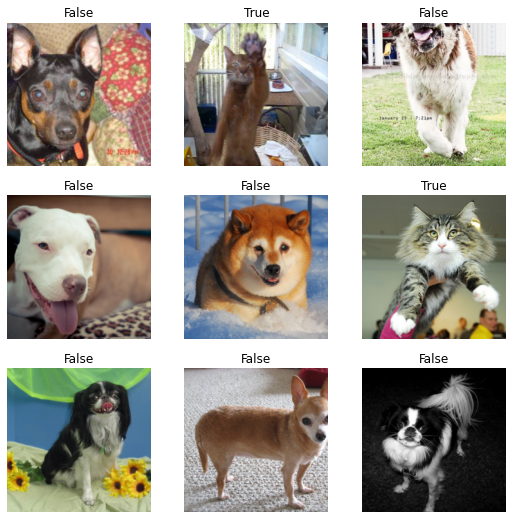

In [11]:
dls.show_batch()

In [12]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

In [13]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.121846,0.018730,0.007442,00:38


epoch,train_loss,valid_loss,error_rate,time
0,0.055219,0.016742,0.005413,00:19


In [16]:
learn.predict(files[0])

('False', tensor(0), tensor([9.9997e-01, 2.7749e-05]))

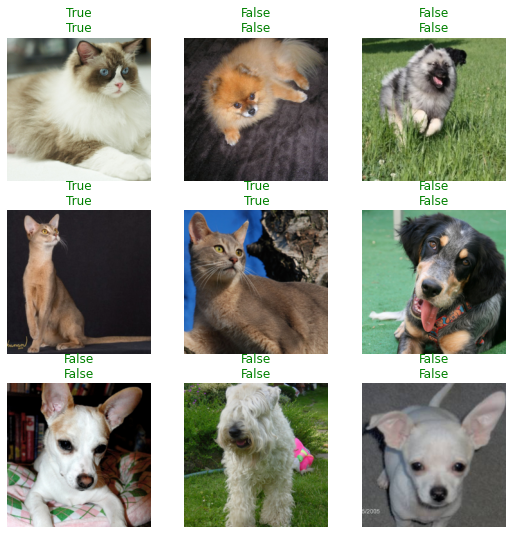

In [17]:
learn.show_results()

In [18]:
files[0].name

'pomeranian_81.jpg'

In [19]:
pat = r'^(.*)_\d+.jpg'

In [20]:
dls = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=Resize(224))

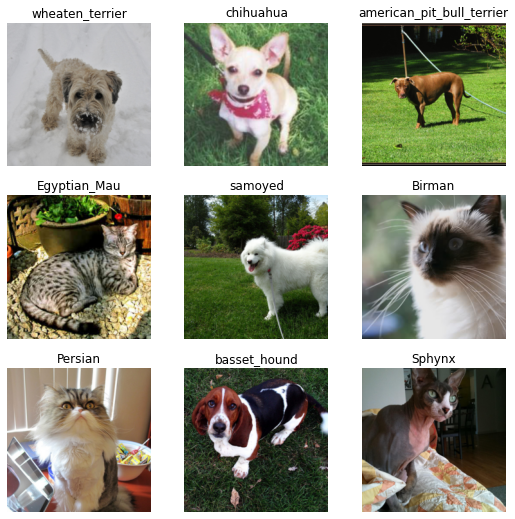

In [21]:
dls.show_batch()

In [22]:
dls = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=Resize(460),
                                  batch_tfms=aug_transforms(size=224))

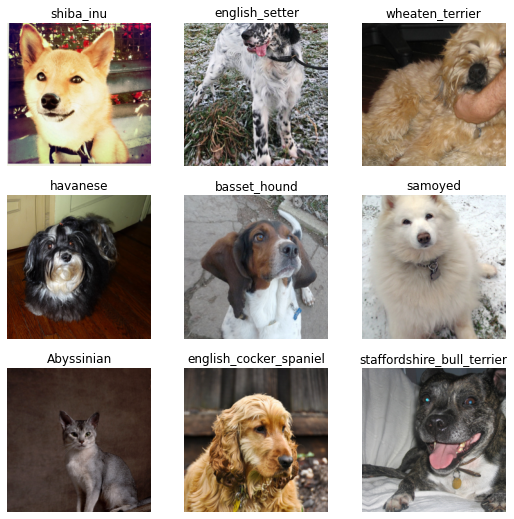

In [23]:
dls.show_batch()

In [24]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

SuggestedLRs(lr_min=0.00831763744354248, lr_steep=0.004365158267319202)

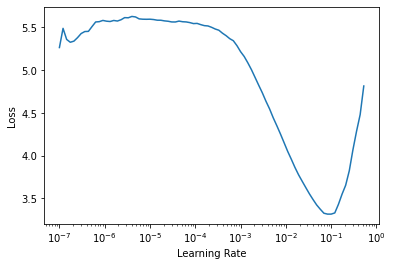

In [25]:
learn.lr_find()

In [26]:
learn.fine_tune(4, 3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.294549,0.340019,0.115697,00:19


epoch,train_loss,valid_loss,error_rate,time
0,0.470745,0.406842,0.116373,00:23
1,0.424216,0.420300,0.128552,00:23
2,0.244384,0.291304,0.085927,00:23
3,0.142452,0.246362,0.073748,00:23


In [27]:
interp = Interpretation.from_learner(learn)

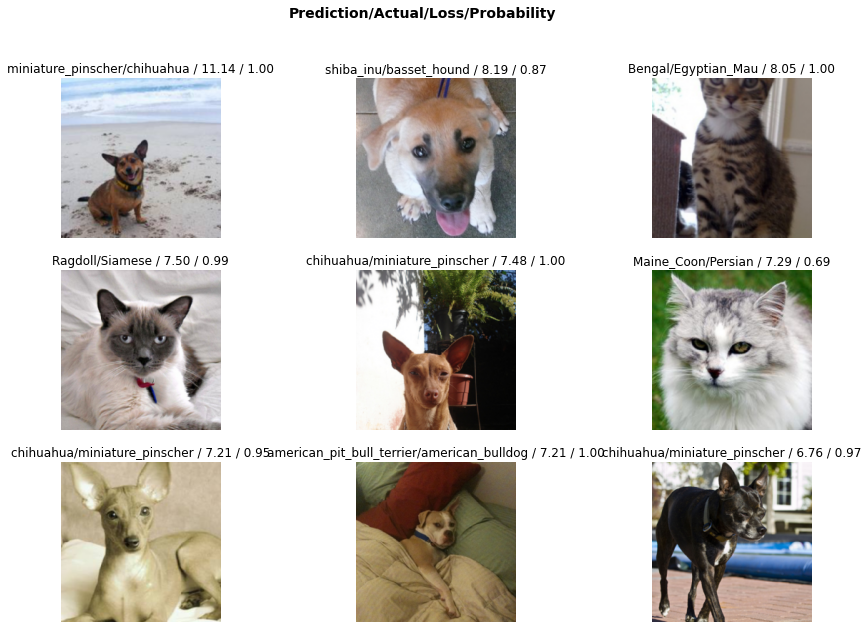

In [28]:
interp.plot_top_losses(9, figsize=(15, 10))

In [30]:
pets = DataBlock(blocks=(ImageBlock, CategoryBlock),
                get_items=get_image_files,
                splitter=RandomSplitter(),
                get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg'), 'name'),
                item_tfms=Resize(460),
                batch_tfms=aug_transforms(size=224))

In [31]:
dls = pets.dataloaders(untar_data(URLs.PETS)/"images")

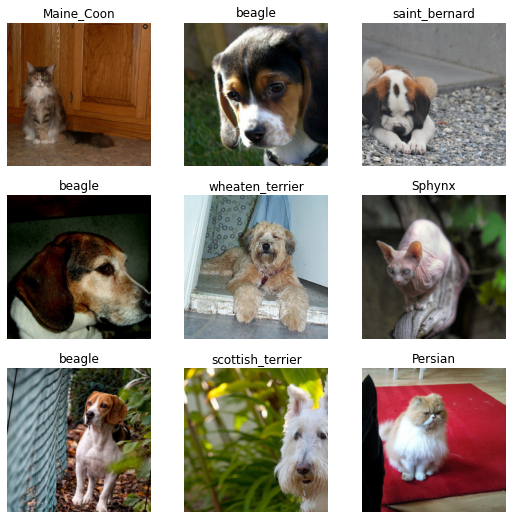

In [32]:
dls.show_batch(max_n=9)

In [41]:
learn.path

Path('/home/jupyter/.fastai/data/oxford-iiit-pet')

In [42]:
path = learn.path

In [43]:
path.ls()

(#4) [Path('/home/jupyter/.fastai/data/oxford-iiit-pet/export.pkl'),Path('/home/jupyter/.fastai/data/oxford-iiit-pet/models'),Path('/home/jupyter/.fastai/data/oxford-iiit-pet/annotations'),Path('/home/jupyter/.fastai/data/oxford-iiit-pet/images')]

In [44]:
path.ls(file_exts='.pkl')

(#1) [Path('/home/jupyter/.fastai/data/oxford-iiit-pet/export.pkl')]

In [45]:
learn_inf = load_learner(path/'export.pkl')

In [50]:
(path/"images").ls()

(#7393) [Path('/home/jupyter/.fastai/data/oxford-iiit-pet/images/pomeranian_81.jpg'),Path('/home/jupyter/.fastai/data/oxford-iiit-pet/images/British_Shorthair_56.jpg'),Path('/home/jupyter/.fastai/data/oxford-iiit-pet/images/japanese_chin_102.jpg'),Path('/home/jupyter/.fastai/data/oxford-iiit-pet/images/scottish_terrier_76.jpg'),Path('/home/jupyter/.fastai/data/oxford-iiit-pet/images/British_Shorthair_98.jpg'),Path('/home/jupyter/.fastai/data/oxford-iiit-pet/images/wheaten_terrier_21.jpg'),Path('/home/jupyter/.fastai/data/oxford-iiit-pet/images/scottish_terrier_102.jpg'),Path('/home/jupyter/.fastai/data/oxford-iiit-pet/images/British_Shorthair_266.jpg'),Path('/home/jupyter/.fastai/data/oxford-iiit-pet/images/yorkshire_terrier_44.jpg'),Path('/home/jupyter/.fastai/data/oxford-iiit-pet/images/Bengal_60.jpg')...]

In [52]:
learn_inf.predict(path/'images/British_Shorthair_56.jpg')

('British_Shorthair',
 tensor(4),
 tensor([5.8395e-07, 4.8742e-08, 2.9353e-06, 1.8558e-03, 9.9651e-01, 5.5138e-07,
         2.1687e-06, 8.6025e-05, 2.6192e-06, 1.4924e-03, 3.6649e-07, 4.7585e-08,
         6.7708e-09, 1.6301e-09, 6.9403e-07, 4.0911e-08, 3.9324e-08, 5.7219e-10,
         7.5662e-08, 9.7806e-08, 3.2193e-08, 1.9924e-08, 2.2974e-07, 3.5224e-08,
         6.7363e-08, 6.9336e-09, 5.5010e-09, 2.6247e-05, 7.9043e-08, 9.5372e-08,
         2.2028e-08, 1.5719e-05, 1.4267e-07, 1.9879e-07, 8.2474e-09, 3.1374e-06,
         9.9246e-08]))

In [53]:
learn_inf.dls.vocab

(#37) ['Abyssinian','Bengal','Birman','Bombay','British_Shorthair','Egyptian_Mau','Maine_Coon','Persian','Ragdoll','Russian_Blue'...]

In [54]:
len(learn_inf.dls.vocab)

37

In [56]:
from fastai2.vision.widgets import *

In [57]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [62]:
type(btn_upload.data[-1])

bytes

In [63]:
PILImage.create??

Output()

In [68]:
pred, pred_idx, probs = learn_inf.predict(img)

Label(value='Prediction: Ragdoll; Probability: 0.4659')

In [89]:
run_button = widgets.Button(description="Classify")

In [95]:
out_pl = widgets.Output()
out_pl.clear_output()

In [96]:
label_prediction = widgets.Label()

In [97]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128, 128))
    pred, pred_idx, probs = learn_inf.predict(img)
    label_prediction.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

run_button.on_click(on_click_classify)

In [98]:
btn_upload = widgets.FileUpload()

In [99]:
VBox([widgets.Label("Select your breed"),
     btn_upload, run_button, out_pl, label_prediction])